# LBNL Baseline Dataset Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Read in Data

In [2]:
real_data = pd.read_csv("../data/lbnl/real_ahu.csv")
real_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,75.92,55,80.61,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,8/28/2007 0:01,75.71,55,80.68,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,8/28/2007 0:02,75.71,55,80.66,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
3,8/28/2007 0:03,75.60,55,80.69,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
4,8/28/2007 0:04,75.81,55,80.60,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,5/31/2009 23:55,66.88,55,67.31,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21596,5/31/2009 23:56,66.77,55,67.29,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21597,5/31/2009 23:57,66.88,55,67.23,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21598,5/31/2009 23:58,66.99,55,67.21,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0


In [3]:
simulated_data = pd.read_csv("../data/lbnl/simulated_ahu.csv")
simulated_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,5/15/2009 23:55,62.56,55,55.62,55.62,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37436,5/15/2009 23:56,62.55,55,55.59,55.59,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37437,5/15/2009 23:57,62.54,55,55.50,55.50,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37438,5/15/2009 23:58,62.52,55,55.49,55.49,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0


In [4]:
simulated_data['Fault Detection Ground Truth']

0        1
1        1
2        1
3        1
4        1
        ..
37435    0
37436    0
37437    0
37438    0
37439    0
Name: Fault Detection Ground Truth, Length: 37440, dtype: int64

In [5]:
from collections import Counter
Counter(simulated_data['Fault Detection Ground Truth'])


Counter({1: 18720, 0: 18720})

In [6]:
from collections import Counter
Counter(real_data['Fault Detection Ground Truth'])

Counter({1: 2880, 0: 18720})

## Inspecting Dates Available

In [7]:
real_data['Datetime'] = pd.to_datetime(real_data['Datetime'])
simulated_data['Datetime'] = pd.to_datetime(simulated_data['Datetime'])

In [8]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 30),
       datetime.date(2009, 5, 31)], dtype=object)

The last two dates are not given in the dataset description. Since we cannot be sure whether they are faulty, let's drop them.

In [9]:
unknown_dates = ['2009-5-31', '2009-5-30'] 

for unknown_date in unknown_dates:
    real_data = real_data[real_data['Datetime'].dt.date != pd.to_datetime(unknown_date).date()]

In [10]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6)], dtype=object)

In [11]:
np.unique(simulated_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2007, 8, 31),
       datetime.date(2007, 9, 1), datetime.date(2007, 9, 2),
       datetime.date(2007, 9, 5), datetime.date(2007, 9, 6),
       datetime.date(2008, 2, 12), datetime.date(2008, 5, 6),
       datetime.date(2008, 5, 7), datetime.date(2008, 5, 8),
       datetime.date(2008, 5, 15), datetime.date(2008, 8, 27),
       datetime.date(2008, 8, 28), datetime.date(2008, 8, 29),
       datetime.date(2008, 8, 30), datetime.date(2008, 8, 31),
       datetime.date(2008, 9, 1), datetime.date(2008, 9, 4),
       datetime.date(2008, 9, 5), datetime.date(2009, 2, 11),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 7),
       datetime.date(2009, 5, 8), datetime.date(2009, 5, 15)],
      dtype=object)

Add unique IDs to each date to make sequencing the data easier

In [12]:
def add_id(df):
    df['date'] = df['Datetime'].dt.date
    df['ID'] = pd.factorize(df['date'])[0]
    df.drop('date', axis=1, inplace=True)
    
    return df

In [13]:
real_data = add_id(real_data)
simulated_data = add_id(simulated_data)

## Selecting Features

In [14]:
real_data.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Exhaust Air Damper Control Signal  ',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure ', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth', 'ID'],
      dtype='object')

In [15]:
real_y = real_data['Fault Detection Ground Truth']
simulated_y = simulated_data['Fault Detection Ground Truth']

In [16]:
non_x_columns = ['Datetime', 'Fault Detection Ground Truth', 'ID']
kept_columns = [c for c in real_data.columns if c not in non_x_columns]

real_X = real_data[kept_columns]
simulated_X = simulated_data[kept_columns]

## Normalizing Data

In [17]:
real_scaler = MinMaxScaler() # assuming you train on simulated and test on real. You will need to change this if you switch
simulated_X = real_scaler.fit_transform(simulated_X)
real_X = real_scaler.transform(real_X)

## Sequencing Data

In [18]:
def sequence_data(df, ids, timestep=10):
    sequenced_data = []
    
    np_df = np.array(df)
    id_array = np.array(ids)
    
    for i in range(timestep, len(id_array)):
        if id_array[i-timestep] == id_array[i]:
            sequenced_data.append(np_df[i-timestep:i])
            
    return np.array(sequenced_data)

In [19]:
num_timestep = 10
sequenced_real = sequence_data(real_X, real_data['ID'], timestep=num_timestep)
sequenced_simulated = sequence_data(simulated_X, simulated_data['ID'], timestep=num_timestep)

In [20]:
print(f'Unsequenced real shape {real_X.shape}')
print(f'Sequenced real shape {sequenced_real.shape}')
print(f'Unsequenced simulated shape {simulated_X.shape}')
print(f'Sequenced simluated shape {sequenced_simulated.shape}')

Unsequenced real shape (18720, 17)
Sequenced real shape (18590, 10, 17)
Unsequenced simulated shape (37440, 17)
Sequenced simluated shape (37180, 10, 17)


Let's check that the sequence makes sense for peace of mind.

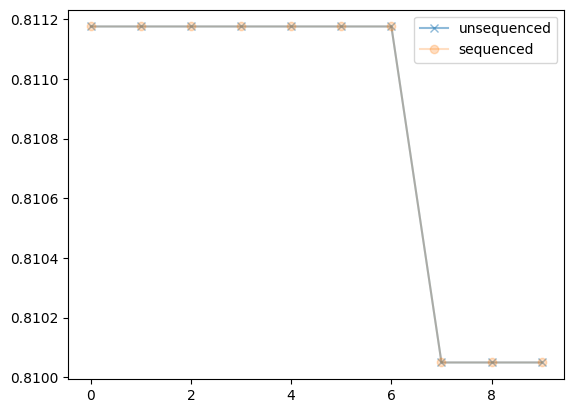

In [21]:
plt.plot(real_X[0:10,3], alpha=0.5, marker='x', label='unsequenced')
plt.plot(sequenced_real[0,0:10,3], alpha=0.25, marker='o', label='sequenced')
plt.legend()

In [29]:
import pickle
with open("../data/lbnl/Unsequenced_real.pkl", 'wb') as file:
    pickle.dump(real_X, file)

with open("../data/lbnl/Sequenced_real.pkl", 'wb') as file:
    pickle.dump(sequenced_real, file)

with open("../data/lbnl/Unsequenced_simulated.pkl", 'wb') as file:
    pickle.dump(simulated_X, file)

with open("../data/lbnl/Sequenced_simulated.pkl", 'wb') as file:
    pickle.dump(sequenced_simulated, file)

In [30]:
with open("../data/lbnl/real_data.pkl", 'wb') as file:
    pickle.dump(real_data, file)

with open("../data/lbnl/Sequenced_simulated.pkl", 'wb') as file:
    pickle.dump(simulated_data, file)

In [39]:
sequenced_real_y = sequence_data(real_y, real_data['ID'], timestep=num_timestep)
sequenced_simulated_y = sequence_data(simulated_y, simulated_data['ID'], timestep=num_timestep)

## LSTM

In [25]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.optimizers import Adam

def create_sequenced_autoencoder(hidden_units, input_shape, timesteps):
    # Input layer
    inputs = Input(shape=(timesteps, input_shape))
    
    # Encoding
    encoded = LSTM(hidden_units)(inputs)
    
    # Replicating the encoded input for the sequence length (decoder's expected input)
    decoded = RepeatVector(timesteps)(encoded)
    
    # Decoding
    decoded = LSTM(input_shape, return_sequences=True)(decoded)
    
    # Model
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mae')
    
    return autoencoder

hidden_units_list = [8, 16, 32]
best_autoencoder = None
best_loss = float('inf')

# Adjusting the input shape to match the sequenced data
input_shape = sequenced_simulated.shape[2]  # Number of features in the data
timesteps = sequenced_simulated.shape[1]    # Sequence length (num_timestep)

for hidden_units in hidden_units_list:
    autoencoder = create_sequenced_autoencoder(hidden_units, input_shape, timesteps)

    history = autoencoder.fit(
        sequenced_simulated, sequenced_simulated,
        epochs=50,
        batch_size=24,
        shuffle=True,
        validation_data=(sequenced_real, sequenced_real),
        verbose=1
    )

    val_loss = np.min(history.history['val_loss'])
    if val_loss < best_loss:
        best_loss = val_loss
        best_autoencoder = autoencoder

print("Best validation loss: ", best_loss)


Epoch 1/50
1550/1550 [==============================] - 12s 6ms/step - loss: 0.0926 - val_loss: 0.1597
Epoch 2/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.0519 - val_loss: 0.1417
Epoch 3/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.0371 - val_loss: 0.1405
Epoch 4/50
1550/1550 [==============================] - 11s 7ms/step - loss: 0.0297 - val_loss: 0.1305
Epoch 5/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.0269 - val_loss: 0.1497
Epoch 6/50
1550/1550 [==============================] - 9s 6ms/step - loss: 0.0251 - val_loss: 0.1556
Epoch 7/50
1550/1550 [==============================] - 9s 6ms/step - loss: 0.0238 - val_loss: 0.1636
Epoch 8/50
1550/1550 [==============================] - 8s 5ms/step - loss: 0.0229 - val_loss: 0.1687
Epoch 9/50
1550/1550 [==============================] - 8s 5ms/step - loss: 0.0223 - val_loss: 0.1709
Epoch 10/50
1550/1550 [==============================] - 9s 6ms/step - loss: 

1162/1162 [==============================] - 3s 2ms/step


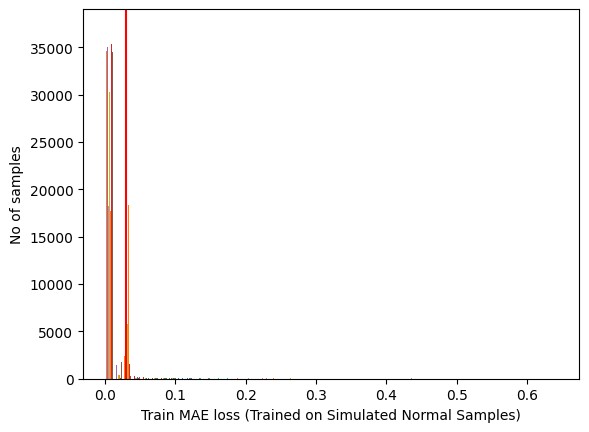

Reconstruction error threshold:  0.02946910399198532


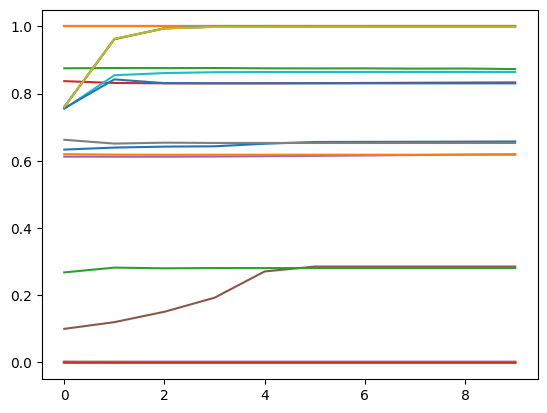

In [32]:
import matplotlib.pyplot as plt

# Use the sequenced data for prediction
X_train_pred = best_autoencoder.predict(sequenced_simulated)

# Calculate MAE loss
train_mae_loss = np.mean(np.abs(X_train_pred - sequenced_simulated), axis=1)

threshold = np.percentile(train_mae_loss, 97)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss (Trained on Simulated Normal Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

print("Reconstruction error threshold: ", threshold)

# Checking how the first sequence is learnt
plt.plot(sequenced_simulated[0])
plt.plot(X_train_pred[0])
plt.show()


581/581 [==============================] - 1s 2ms/step


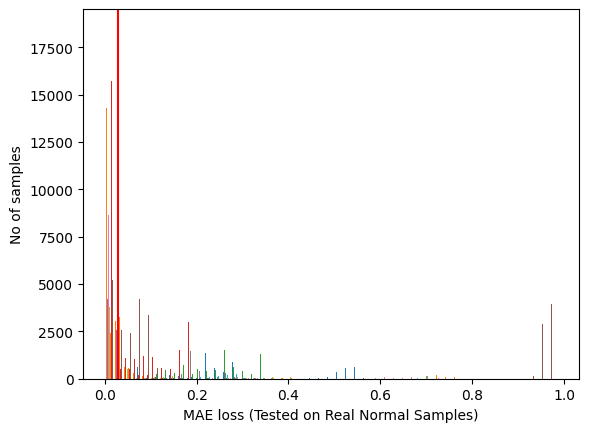

In [33]:
X_test_pred = best_autoencoder.predict(sequenced_real)

test_mae_loss = np.mean(np.abs(X_test_pred-sequenced_real), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("MAE loss (Tested on Real Normal Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, labels):
    
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [49]:
sequenced_real_y

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
sequenced_real_y_1d = sequenced_real_y[:, -1]
print(sequenced_real_y_1d.shape)


(18590,)


In [67]:
with open("../data/lbnl/sequenced_real_y_1d.pkl", 'wb') as file:
    pickle.dump(sequenced_real_y_1d, file)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
sequence_mae = np.mean(test_mae_loss, axis=1)
real_predict_y = (sequence_mae > threshold).astype(int)

conf_matrix = confusion_matrix(sequenced_real_y_1d, real_predict_y)
accuracy = accuracy_score(sequenced_real_y_1d, real_predict_y)
precision, recall, fscore, support = precision_recall_fscore_support(sequenced_real_y_1d, real_predict_y, labels=[0, 1])
print("\nAccuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", fscore)
print(conf_matrix)


Accuracy: 0.11802044109736418
Precision:  [0.34336783 0.08892128]
Recall:  [0.04640814 0.51188811]
F1 Score:  [0.08176523 0.15152142]
[[  730 15000]
 [ 1396  1464]]
